## Assignment 2

This assignment is made by Muhammad Aziz Pratama

### import library

In [1]:
#first, import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
%matplotlib inline

### Read data

In [3]:
#read the data
df = pd.read_csv('dataset/nyc-rolling-sales.csv')

In [4]:
#seeing the first 5 data
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
#info data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
#drop the columns that has no value
df.drop(columns=['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER'], inplace=True)

In [7]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [8]:
#replace the borough with its name, easier to read data
df['BOROUGH'] = df.replace({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})

In [9]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [10]:
#SALE PRICE, LAND and GROSS SQUARE FEET is object but should be numeric
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

#Borough and Both TAX CLASS attributes should be categorical
df['BOROUGH'] = df['BOROUGH'].astype('category')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')

#SALE DATE is object but should be datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

#using error=coerce, if there is an error will be replaced with null/nan

In [11]:
#count missing value
df.isnull().sum()/len(df)*100

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.000000
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.000000
ADDRESS                            0.000000
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  31.049818
GROSS SQUARE FEET                 32.658372
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                        17.222170
SALE DATE                          0.000000
dtype: float64

In [12]:
#get the data without missing values
df = df[df['SALE PRICE'].notnull()]
df = df[df['LAND SQUARE FEET'].notnull()]
df = df[df['GROSS SQUARE FEET'].notnull()]
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


now we have 48244 rows of data

In [13]:
#short describe of the data
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,4.824400e+04,4.824400e+04,48244.000000,4.824400e+04
mean,4984.532191,234.324662,10939.681328,2.566537,0.249171,2.834632,3.358117e+03,3.669753e+03,1827.765173,1.153281e+06
std,3427.418090,496.361521,1072.752086,17.465481,10.988072,20.750418,3.143590e+04,2.947491e+04,464.361153,1.340131e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2206.750000,21.000000,10469.000000,1.000000,0.000000,1.000000,1.413000e+03,8.280000e+02,1920.000000,8.042000e+04
50%,4660.500000,45.000000,11217.000000,1.000000,0.000000,1.000000,2.140000e+03,1.620000e+03,1931.000000,4.800000e+05
75%,6996.000000,94.000000,11237.000000,2.000000,0.000000,2.000000,3.071000e+03,2.520000e+03,1961.000000,8.300000e+05
max,16319.000000,9009.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.210000e+09


In [14]:
#taking list of borough
boroughs = df['BOROUGH'].unique()

#taking list of categorical features
cat_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE']
#taking list of numerical features
num_columns = ['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

### Mean

In [15]:
#mean from all numeric columns
for column in num_columns:
    mean = df[column].mean()
    print('Mean from ' + column + ' in NYC is', mean)

Mean from RESIDENTIAL UNITS in NYC is 2.566536771411989
Mean from COMMERCIAL UNITS in NYC is 0.24917088135312163
Mean from TOTAL UNITS in NYC is 2.8346322858801094
Mean from LAND SQUARE FEET in NYC is 3358.116553353785
Mean from GROSS SQUARE FEET in NYC is 3669.752528811873
Mean from SALE PRICE in NYC is 1153281.4458170964


#### how's average sale price in 5 borough ?

In [16]:
mean_data = []
for borough in boroughs:
    data = (df[df['BOROUGH'] == borough])
    mean = data['SALE PRICE'].mean()
    mean_data.append(mean)
    print('Average Sale Price in ' + borough + ' is',mean)

Average Sale Price in Manhattan is 18517220.17693837
Average Sale Price in Bronx is 590193.6434955313
Average Sale Price in Brooklyn is 834488.3717719465
Average Sale Price in Queens is 912305.4611843294
Average Sale Price in Staten Island is 528603.8321484992


### Median

In [17]:
#median from all numeric columns
for column in num_columns:
    median = df[column].median()
    print('median from ' + column + ' in NYC is', median)

median from RESIDENTIAL UNITS in NYC is 1.0
median from COMMERCIAL UNITS in NYC is 0.0
median from TOTAL UNITS in NYC is 1.0
median from LAND SQUARE FEET in NYC is 2140.0
median from GROSS SQUARE FEET in NYC is 1620.0
median from SALE PRICE in NYC is 480000.0


#### how's median sale price in 5 borough ?

In [18]:
median_data = []
for borough in boroughs:
    data = (df[df['BOROUGH'] == borough])
    median = data['SALE PRICE'].median()
    median_data.append(mean)
    print('Median Sale Price in ' + borough + ' is',median)

Median Sale Price in Manhattan is 6000000.0
Median Sale Price in Bronx is 270000.0
Median Sale Price in Brooklyn is 420000.0
Median Sale Price in Queens is 635000.0
Median Sale Price in Staten Island is 485000.0


### Modus

In [19]:
#mode from all categorical columns
for column in cat_columns:
    mode = df[column].mode()
    print(mode[0],'is',column,'with the most deals in NYC')

Brooklyn is BOROUGH with the most deals in NYC
BEDFORD STUYVESANT is NEIGHBORHOOD with the most deals in NYC
01 ONE FAMILY DWELLINGS                     is BUILDING CLASS CATEGORY with the most deals in NYC
1 is TAX CLASS AT PRESENT with the most deals in NYC
A1 is BUILDING CLASS AT PRESENT with the most deals in NYC
11201 is ZIP CODE with the most deals in NYC
1920 is YEAR BUILT with the most deals in NYC
1 is TAX CLASS AT TIME OF SALE with the most deals in NYC
A1 is BUILDING CLASS AT TIME OF SALE with the most deals in NYC


#### How's distribution of Sale in 5 Borough

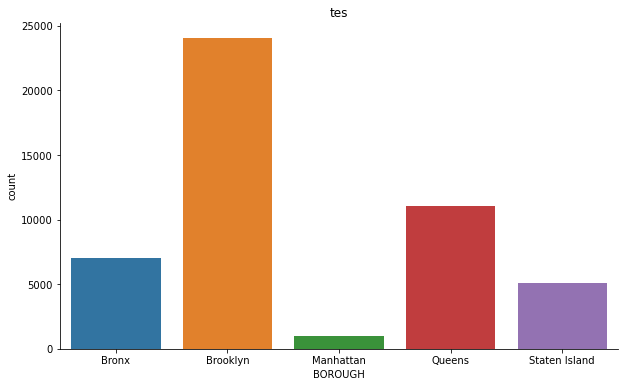

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df, x='BOROUGH', ax=ax)
plt.title('tes')

sns.despine()
plt.show()

From the plot above, we know that Brooklyn has the most deals in NYC, and Manhattan has the least deals in NYC

#### How's distribution of Sale with incredibly low price (such as 0, 1)

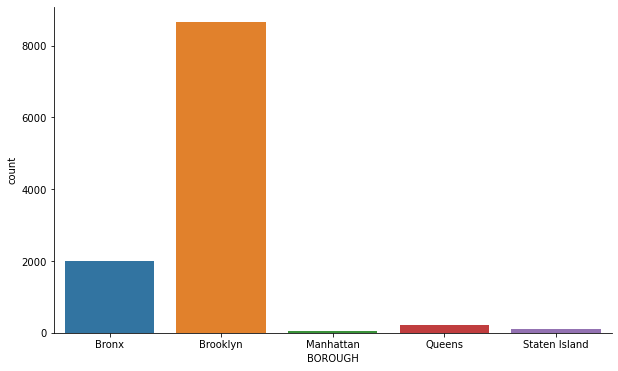

In [21]:
sale_price_0 = df[df['SALE PRICE'] <= 10]

fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=sale_price_0, x='BOROUGH', ax=ax)

sns.despine()
plt.show()

From the plot above, Brooklyn is still the most deals with increadibly low price (maybe the parents give it to their child)

### Range

In [22]:
#range from all numeric columns
for column in num_columns:
    minimum = df[column].min()
    maximum = df[column].max()
    the_range = maximum - minimum
    print('minimum of',column,'in NYC is',minimum)
    print('maximum of',column,'in NYC is',maximum)
    print('range of',column,'is',the_range,'\n')

minimum of RESIDENTIAL UNITS in NYC is 0
maximum of RESIDENTIAL UNITS in NYC is 1844
range of RESIDENTIAL UNITS is 1844 

minimum of COMMERCIAL UNITS in NYC is 0
maximum of COMMERCIAL UNITS in NYC is 2261
range of COMMERCIAL UNITS is 2261 

minimum of TOTAL UNITS in NYC is 0
maximum of TOTAL UNITS in NYC is 2261
range of TOTAL UNITS is 2261 

minimum of LAND SQUARE FEET in NYC is 0.0
maximum of LAND SQUARE FEET in NYC is 4228300.0
range of LAND SQUARE FEET is 4228300.0 

minimum of GROSS SQUARE FEET in NYC is 0.0
maximum of GROSS SQUARE FEET in NYC is 3750565.0
range of GROSS SQUARE FEET is 3750565.0 

minimum of SALE PRICE in NYC is 0.0
maximum of SALE PRICE in NYC is 2210000000.0
range of SALE PRICE is 2210000000.0 



In [23]:
range_data = []
for borough in boroughs:
    data = (df[df['BOROUGH'] == borough])
    the_range = np.ptp(data['SALE PRICE'])
    range_data.append(the_range)
    print(borough + ' selling price range is', the_range)

Manhattan selling price range is 2209999999.0
Bronx selling price range is 110000000.0
Brooklyn selling price range is 345000000.0
Queens selling price range is 257499999.0
Staten Island selling price range is 11899999.0


#### what is range selling price in 5 borough, if the price start from 1000 usd

In [24]:
#if we start from 1000 usd
data = df[df['SALE PRICE'] >= 1000]

range_data = []
for borough in boroughs:
    data_borough = (data[data['BOROUGH'] == borough])
    the_range = np.ptp(data_borough['SALE PRICE'])
    range_data.append(the_range)
    print(borough + ' selling price range is', the_range)

Manhattan selling price range is 2209995937.0
Bronx selling price range is 109999000.0
Brooklyn selling price range is 344999000.0
Queens selling price range is 257499000.0
Staten Island selling price range is 11899000.0


### Variance

In [25]:
#mean from all numeric columns
for column in num_columns:
    variance = df[column].var()
    print('Variance from ' + column + ' in NYC is', variance)

Variance from RESIDENTIAL UNITS in NYC is 305.04304079258065
Variance from COMMERCIAL UNITS in NYC is 120.73771773792711
Variance from TOTAL UNITS in NYC is 430.57982912279834
Variance from LAND SQUARE FEET in NYC is 988215601.3165478
Variance from GROSS SQUARE FEET in NYC is 868770428.6990151
Variance from SALE PRICE in NYC is 179595088102008.56


### Standard Deviation

In [26]:
#mean from all numeric columns
for column in num_columns:
    stdev = df[column].std()
    print('Standard Deviation from ' + column + ' in NYC is', stdev)

Standard Deviation from RESIDENTIAL UNITS in NYC is 17.465481407409893
Standard Deviation from COMMERCIAL UNITS in NYC is 10.988071611430602
Standard Deviation from TOTAL UNITS in NYC is 20.750417565022598
Standard Deviation from LAND SQUARE FEET in NYC is 31435.896699737194
Standard Deviation from GROSS SQUARE FEET in NYC is 29474.91185226879
Standard Deviation from SALE PRICE in NYC is 13401309.193582863


### Distribution

#### How's distribution of Sale Price in NYC ?

In [29]:
#setting the style of visualization plot
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(13,7.5)})

C:\Users\62852\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


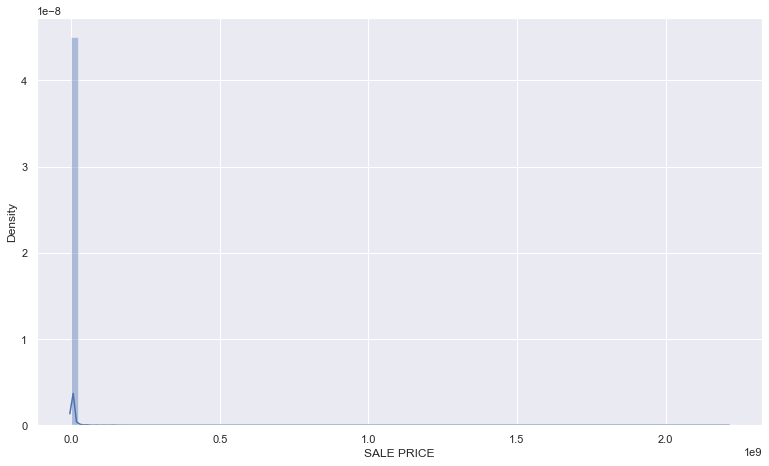

In [30]:
sns.distplot(df['SALE PRICE'], bins=100)

plt.show()

From the distribution plot above, we know that the distribution of Sale Price is not normal.

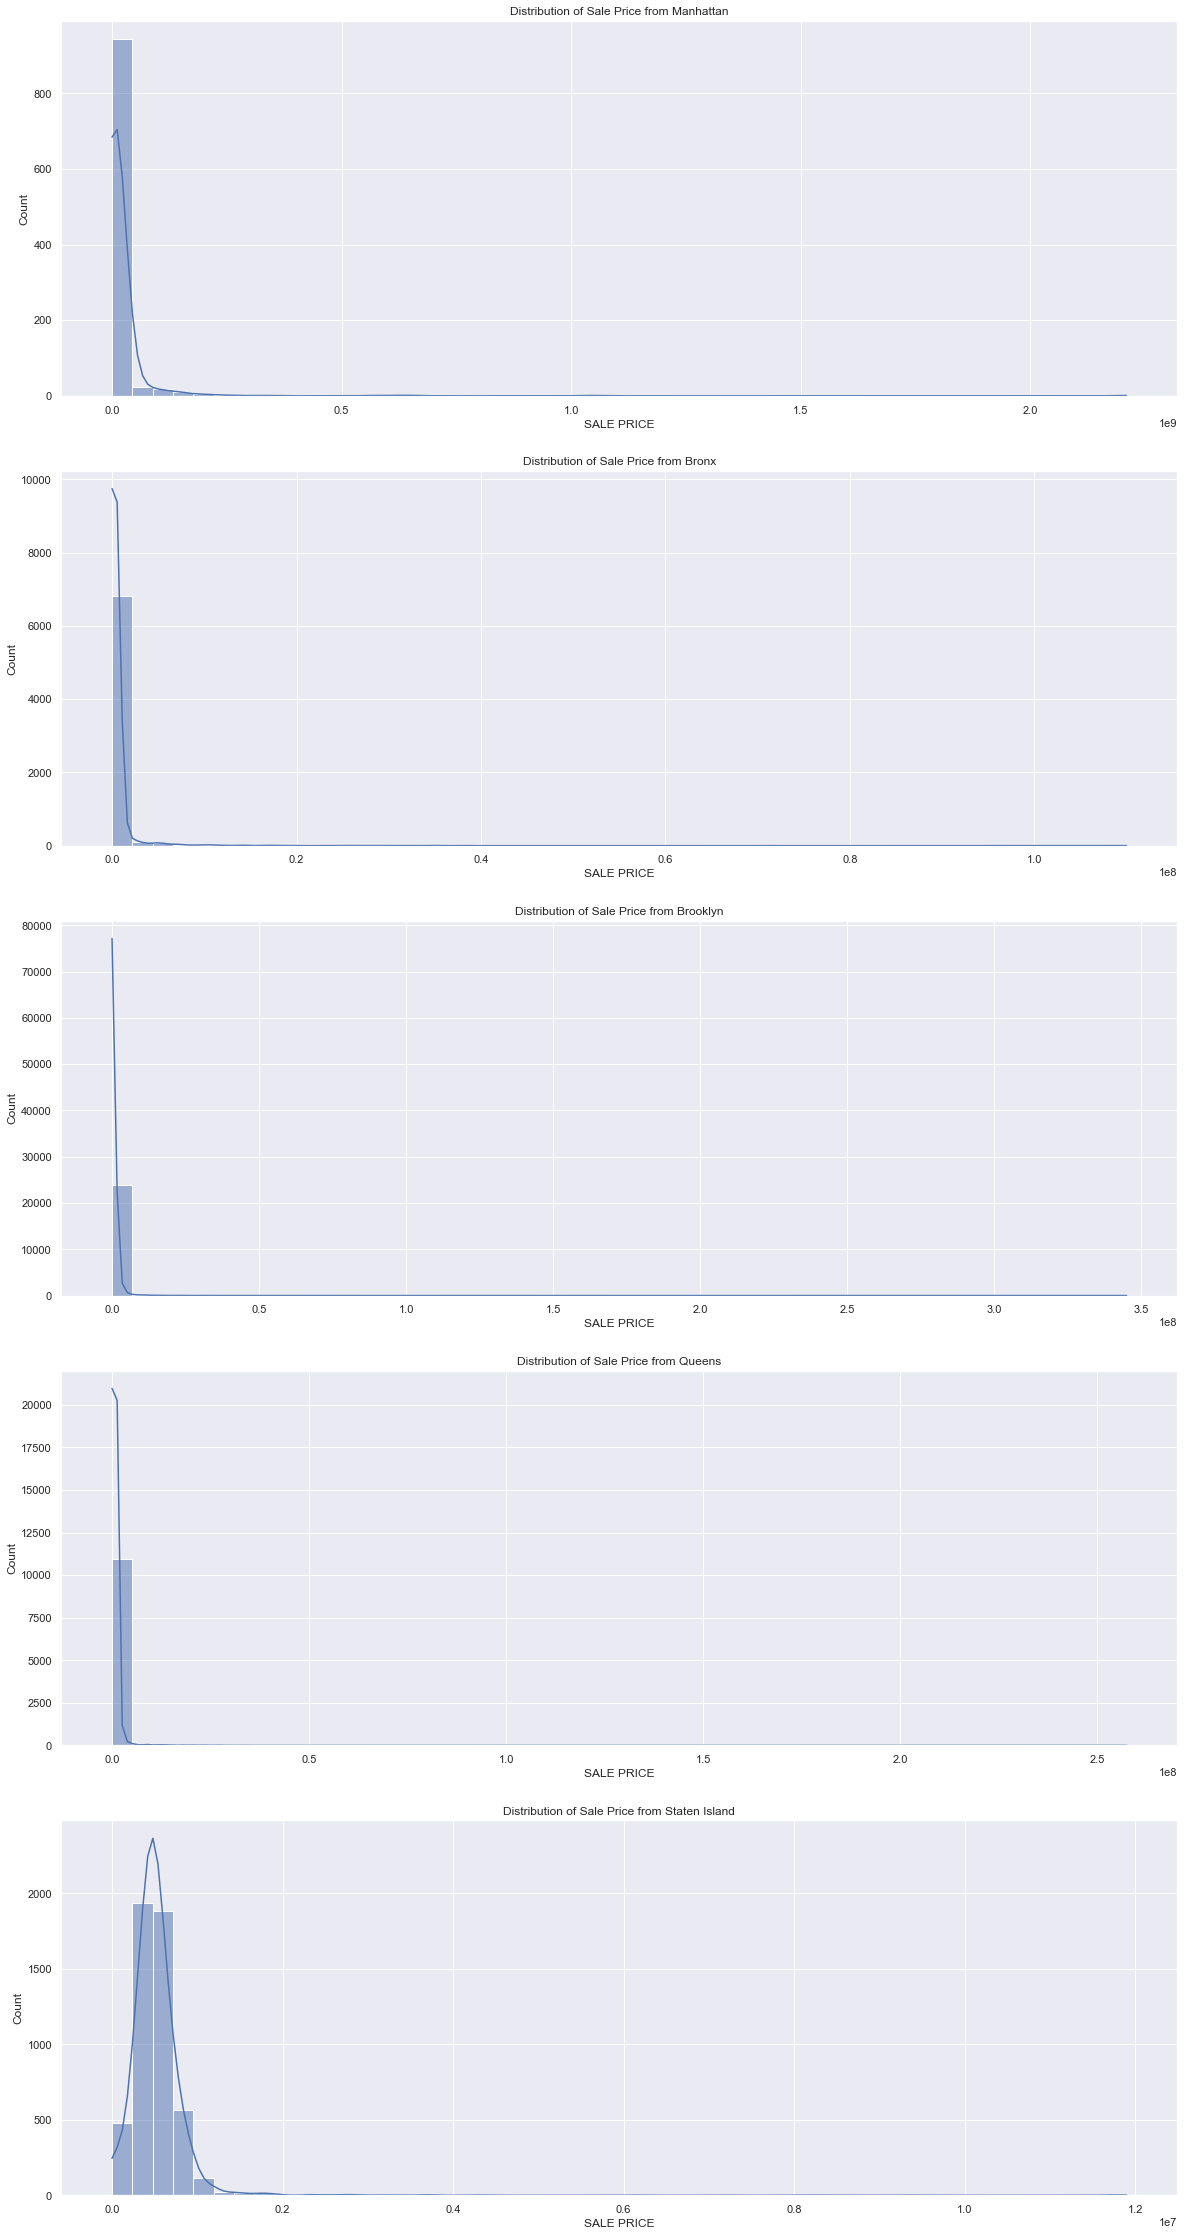

In [31]:
fig, axes = plt.subplots(5, 1, figsize=(20,40))

for i, borough in enumerate(boroughs):
    data = df[df['BOROUGH'] == borough]
    sns.histplot(data['SALE PRICE'], bins=50, ax=axes[i], kde=True)
    axes[i].set_title('Distribution of Sale Price from '+borough)

plt.show()

despite of various range sale price, there is no Borough that have normal distribution of sale price

### Confidence Interval

#### how's the confidence interval of mean sale price in Manhattan ?

In [ ]:
#setting the style of visualization plot
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(13,7.5)})

In [29]:
#get the data of Manhattan
manhat = df[df['BOROUGH'] == 'Manhattan']

C:\Users\62852\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


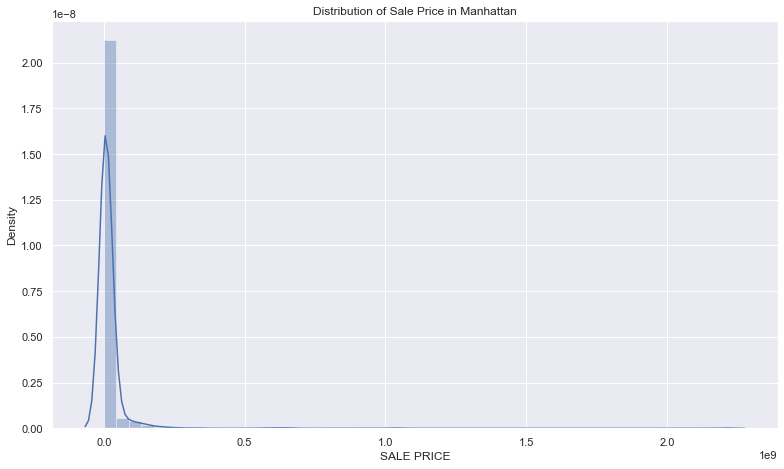

In [119]:
#distribution plot sale price Manhattan
sns.distplot(manhat['SALE PRICE'], bins=50)
plt.title('Distribution of Sale Price in Manhattan')

plt.show()

In [28]:
#mean and std dev sale price
price_mean_manhat = manhat['SALE PRICE'].mean()
price_std_manhat = manhat['SALE PRICE'].std()

print(price_mean_manhat, ',', price_std_manhat)

18517220.17693837 , 87939086.52533463


In [61]:
#because its not normal distribution, we need to make sample of means
sample_means = []
n = 1000
for sample in range(0, 3000):
    sample_values = np.random.choice(a=manhat['SALE PRICE'], size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

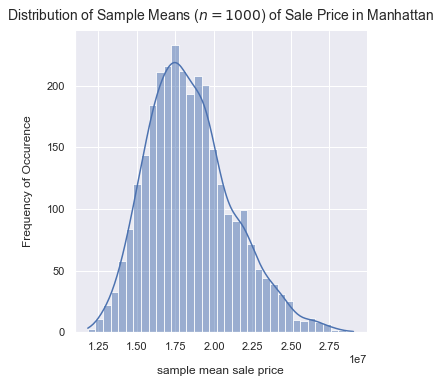

In [76]:
sns.displot(sample_means, kde=True)
plt.title('Distribution of Sample Means ($n=1000$) of Sale Price in Manhattan', y=1.015, fontsize = 14)
plt.xlabel('sample mean sale price', labelpad=14)
plt.ylabel('Frequency of Occurence', labelpad=14)

plt.show()

In [79]:
#calculate median of sample means
median_of_sample_mean = np.median(sample_means)
median_of_sample_mean

18148164.3275

In [80]:
#calculate median of sample means
mean_of_sample_mean = np.mean(sample_means)
mean_of_sample_mean

18452633.055238

In [81]:
#calculate standard deviation of sample means
std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

2774553.6437043687

In [83]:
#calculate the standard error
standard_error = price_std_manhat/np.sqrt(n)
standard_error

2780878.0877467985

In [85]:
tail = 1 - stats.norm.cdf(1.96)
tail

0.024997895148220484

In [86]:
1 - (tail*2)

0.950004209703559

In [87]:
#calculate lower area of 95% of sample mean
lower_95_perc_bound = mean_of_sample_mean - 1.96*standard_error
lower_95_perc_bound

13002112.003254276

In [88]:
#calculate upper area of 95% of sample mean
upper_95_perc_bound = mean_of_sample_mean + 1.96*standard_error
upper_95_perc_bound

23903154.107221726

95% CI states that the population mean of Manhattan Sale Price level lies between 13002112.003254276, 23903154.107221726

### Hypothesis Testing

#### Research Question
from the data that we have, is Brooklyn have significant bigger average sale price from Queens ?

Null Hypothesis: μ1=μ2 <br>
Alternative Hypthosis: μ1≠μ2

In [32]:
#get the Queens and Brooklyn data
data_queens = df[df['BOROUGH'] == 'Queens']
data_brooklyn = df[df['BOROUGH'] == 'Brooklyn']

In [33]:
n1 = len(data_queens) 
mu1 = data_queens['SALE PRICE'].mean()
sd1 = data_queens['SALE PRICE'].std()

(n1,mu1,sd1)

(11078, 912305.4611843294, 3721584.8773834794)

In [34]:
n2 = len(data_brooklyn) 
mu2 = data_brooklyn['SALE PRICE'].mean()
sd2 = data_brooklyn['SALE PRICE'].std()

(n2,mu2,sd2)

(24047, 834488.3717719465, 3935813.428569773)

In [35]:
#begin the test
sm.stats.ztest(data_queens['SALE PRICE'], data_brooklyn['SALE PRICE'], alternative='two-sided')

(1.751336483996908, 0.07988796676258987)

I used alternative="two-sided" because i want to check the inequality.

Because p-value is 0.07988796676, which is greater than 0.05. From the test, found that failing to reject the null hypothesis at a 5% significance level. So, sale price in Brooklyn and Queens is not the same. But, we know that the difference is not significant.

### Conclusion

Berdasarkan analisis yang telah dilakukan pada data Penjualan Properti di NYC, kita ketahui bahwa :

- Rata-rata Sale Price tertinggi ada di daerah Manhattan, sedangkang yang terendah ada di Staten Island
- 01 One Family Dwelling merupakan Category Build yang tercatat penjualan terbanyak di NYC
- BEDFORD STUYVESANT adalah neighborhood yang tercatat penjualan terbanyak di NYC
- Persebaran distribusi data sale price setiap borough memiliki distribusi yang tidak normal.
- Brooklyn merupakan daerah yang paling banyak terjadinya penjualan.
- Berdasarkan CI 95%, rata-rata sale price di Manhattan berada dikisaran 13-26 juta.
- Rata-rata sale price di Brooklyn lebih besar namun tidak signifikan daripada Rata-rata sale price di Queens.

Saran :
- Jika perusahaan properti ingin membuat dan memasarkan properti atau bangunan yang mewah dengan harga fantastis, disarankan untuk mencoba di daerah Manhattan.
- Perusahaan properti juga dapat mempertimbangkan Brooklyn yang memiliki kawasan dengan penjualan terbanyak.